 # Advanced Classification Part 6 - Exercises with Results

## Exercise 1

#### Task 1 
##### Load libraries that are used in this module.

#### Result:

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from pathlib import Path

#### Task 2
##### Define the directory settings.

#### Result:

In [2]:
# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)

/Users/aashika/Desktop/skillsoft-advanced-classification-2022
/Users/aashika/Desktop/skillsoft-advanced-classification-2022/data


#### Task 3

##### Load the pickle  `bank_clean.sav` that we saved from last time and save it as `bank`.
##### Load the pickle `metrics_svm_ex` and save it with the same name.
##### View the first few rows and column names of `bank`.

#### Result:

In [3]:
bank =  pickle.load(open(str(data_dir)+"/bank_clean.sav","rb"))

In [4]:
metrics_svm_ex = pickle.load(open(str(data_dir)+"/metrics_svm_ex.sav","rb"))

In [5]:
bank.head()

,age,campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
35577,32,1,-1.8,92.893,-46.2,1.244,5099,0
13950,33,2,1.4,93.918,-42.7,4.963,5228,0
29451,25,5,-1.8,93.075,-47.1,1.405,5099,1
32295,34,1,-1.8,92.893,-46.2,1.313,5099,0
27477,53,7,-0.1,93.200,-42.0,4.021,5196,0


In [8]:
bank.columns

Index(['age', 'campaign', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

#### Task 4
##### Select the predictors by dropping variable `y` and save the result to a dataframe `X_ex`.
##### Save the target variable `y` column to `y_ex` variable.
##### Set seed as 1.
##### Split the data into train and test sets and save respective variables to `X_train_ex`, `X_test_ex`,  `y_train_ex`,  `y_test_ex`.

#### Result:

In [6]:
# Select the predictors and target.
X_ex = bank.drop(['y'], axis = 1)
y_ex = np.array(bank['y'])

# Set the seed to 1.
np.random.seed(1)

# Split into training and test sets.
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y_ex, test_size = 0.3)

#### Task 5

##### Create an SVM model and save as `ex_sv_machine`. 
##### Set the kernel as `rbf` and gamma as 0.011

##### Fit `ex_sv_machine` with `X_train_ex` and `y_train_ex`. 

#### Result:

In [7]:
ex_sv_machine = SVC(kernel = 'rbf', 
                    gamma = 0.011,
                   probability = True)
ex_sv_machine.fit(X_train_ex, y_train_ex)

SVC(gamma=0.011, probability=True)

#### Task 6

##### Using the trained `ex_sv_machine`, predict on the test data. 
##### Save the prediction as `ex_svm_y_predict` and print the first five rows of the prediction. 
##### Save the prediction probabilities as `ex_svm_y_predict_prob`.
##### Print the first five rows of the prediction and prediction probabilities.

#### Result:

In [8]:
ex_svm_y_predict = ex_sv_machine.predict(X_test_ex)
ex_svm_y_predict[0:5]

array([0, 0, 0, 0, 0])

In [9]:
#Predict on test, but instead of labels 
# we will get probabilities for class 0 and 1.
ex_svm_y_predict_prob = ex_sv_machine.predict_proba(X_test_ex) 
print(ex_svm_y_predict_prob[5:])

[[0.89245481 0.10754519]
 [0.87835126 0.12164874]
 [0.89196819 0.10803181]
 ...
 [0.89197076 0.10802924]
 [0.51042778 0.48957222]
 [0.89697726 0.10302274]]


#### Task 7

##### Compute the metrics of our svm model using the function - `get_performance_scores` given below and save as `ex_svm_scores` and print results.


In [10]:
def get_performance_scores(y_test, y_predict, y_predict_prob, eps=1e-15, beta=0.5):

    from sklearn import metrics

    # Scores keys.
    metric_keys = ["accuracy", "precision", "recall", "f1", "fbeta", "log_loss", "AUC"]

    # Score values.
    metric_values = [None]*len(metric_keys)

    metric_values[0] = metrics.accuracy_score(y_test, y_predict)
    metric_values[1] = metrics.precision_score(y_test, y_predict)
    metric_values[2] = metrics.recall_score(y_test, y_predict)
    metric_values[3] = metrics.f1_score(y_test, y_predict)
    metric_values[4] = metrics.fbeta_score(y_test, y_predict, beta=beta)
    metric_values[5] = metrics.log_loss(y_test, y_predict_prob[:, 1], eps=eps)
    metric_values[6] = metrics.roc_auc_score(y_test, y_predict_prob[:, 1])

    perf_metrics = dict(zip(metric_keys, metric_values))

    return(perf_metrics)

#### Result:

In [11]:
ex_svm_scores = get_performance_scores(y_test_ex, ex_svm_y_predict, ex_svm_y_predict_prob)
print(ex_svm_scores)

{'accuracy': 0.8883333333333333, 'precision': 0.6875, 'recall': 0.1506849315068493, 'f1': 0.24719101123595508, 'fbeta': 0.4014598540145985, 'log_loss': 0.33948746548881387, 'AUC': 0.6358425827246497}


#### Task 8

##### Save the precision-recall curve of the svm model  in `ex_svm_prec_recall`. Set parameters as shown in class.
##### Plot the curve `ex_svm_prec_recall`. 


#### Result:

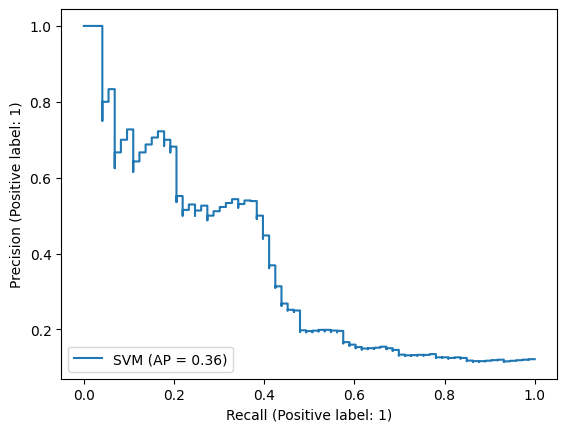

In [12]:
ax = plt.gca() #<- create a new axis object
ex_svm_prec_recall = metrics.plot_precision_recall_curve(ex_sv_machine,
                                 X_test_ex, 
                                 y_test_ex,
                                 ax = ax,
                                 name = "SVM")
plt.show()

#### Task 9

##### Similar to above, plot the ROC curve of the svm model.
##### Save the curve as `ex_svm_roc`.
##### Plot the curve `ex_svm_roc`. 

#### Result:

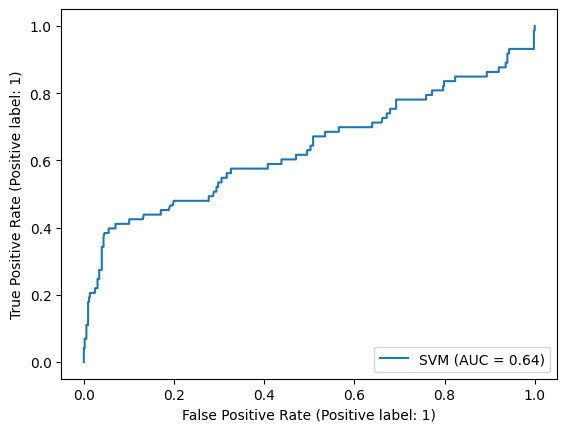

In [13]:
ax = plt.gca()
ex_svm_roc = metrics.plot_roc_curve(ex_sv_machine,
                       X_test_ex,
                       y_test_ex,
                       name = "SVM",
                       ax = ax)


plt.show()

#### Task 10

##### Save the scores `svm_scores`  as  "SVM" to `metrics_svm_ex`.

#### Result:

In [14]:
# Add the model to our dataframe.
metrics_svm_ex.update({"SVM": ex_svm_scores})
print(metrics_svm_ex)

{'RF': {'accuracy': 0.8716666666666667, 'precision': 0.4411764705882353, 'recall': 0.2054794520547945, 'f1': 0.2803738317757009, 'fbeta': 0.3588516746411483, 'log_loss': 1.0075494584661249, 'AUC': 0.7337734917210366}, 'Optimized RF': {'accuracy': 0.8933333333333333, 'precision': 0.7142857142857143, 'recall': 0.2054794520547945, 'f1': 0.3191489361702127, 'fbeta': 0.4777070063694268, 'log_loss': 0.31929555370400753, 'AUC': 0.7813287931168932}, 'GBM': {'accuracy': 0.895, 'precision': 0.7083333333333334, 'recall': 0.2328767123287671, 'f1': 0.3505154639175258, 'fbeta': 0.5029585798816569, 'log_loss': 0.30041312491642347, 'AUC': 0.7918172129656105}, 'Optimized GBM': {'accuracy': 0.8816666666666667, 'precision': 0.5714285714285714, 'recall': 0.1095890410958904, 'f1': 0.1839080459770115, 'fbeta': 0.3100775193798449, 'log_loss': 0.3196653331095461, 'AUC': 0.7571287463284032}, 'SVC': {'accuracy': 0.87, 'precision': 0.3333333333333333, 'recall': 0.0684931506849315, 'f1': 0.11363636363636363, 'fbe

## Exercise 2

#### Task 1

##### Set the range parameters for cross-validation as 
```[{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}]
```
##### and save as `ex_tuned_parameters`.
##### Fit the tuned parameters for grid search to svm and save as `ex_svm_cv`.
##### Train the model with `X_train_ex` and `y_train_ex`.


#### Result: 

In [15]:
# Set the parameters by cross-validation.
ex_tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                        'C': [1, 10, 100, 1000]}]

# Fit the tuned parameters for grid search to SVM. 
ex_svm_cv = GridSearchCV(SVC(), ex_tuned_parameters, cv = 5)
ex_svm_cv.fit(X_train_ex, y_train_ex)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

#### Task 2

##### Find the best tuned parameters for `ex_svm_cv`.
##### Save each of the best parameters as `ex_optimized_c`, `ex_optimized_gamma`, and `ex_optimized_kernel`.

#### Result:

In [16]:
print(ex_svm_cv.best_params_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [17]:
ex_optmized_c = ex_svm_cv.best_params_['C']
ex_optmized_gamma = ex_svm_cv.best_params_['gamma']
ex_optmized_kernel = ex_svm_cv.best_params_['kernel']

#### Task 3

##### Using the optimized parameters as hyperparameters, create a SVM model and save as `ex_sv_cv_optimized`.
##### Train `ex_sv_cv_optimized` with `X_train_ex` and `y_train_ex`.

#### Result:

In [18]:
# Run the model with optimized hyperparameters.
ex_sv_cv_optimized = SVC(kernel = ex_optmized_kernel,
                        gamma = ex_optmized_gamma, 
                        C = ex_optmized_c,
                        probability = True)

ex_sv_cv_optimized.fit(X_train_ex, y_train_ex)

SVC(C=1, gamma=0.0001, probability=True)

#### Task 4
##### Using `ex_sv_cv_optimized`, predict on the test data and save as `ex_opt_svm_y_predict`.
##### Save the prediction probabilities as `ex_opt_svm_y_predict_prob`.
##### Print the first five rows of the prediction and prediction probabilities.

#### Result:

In [19]:
# Predict on the test dataset.
ex_opt_svm_y_predict = ex_sv_cv_optimized.predict(X_test_ex)
ex_opt_svm_y_predict[0:5]

array([0, 0, 0, 0, 0])

In [20]:
# Predict on test, but instead of labels 
# we will get probabilities for class 0 and 1.
ex_opt_svm_y_predict_prob = ex_sv_cv_optimized.predict_proba(X_test_ex) 
print(ex_opt_svm_y_predict_prob[5:])

[[0.89561176 0.10438824]
 [0.30097429 0.69902571]
 [0.89557113 0.10442887]
 ...
 [0.8953811  0.1046189 ]
 [0.89483774 0.10516226]
 [0.89523078 0.10476922]]


#### Task 5

##### Compute the metrics of our svm model and save as `ex_opt_svm_scores` and print results.

#### Result:

In [21]:
ex_opt_svm_scores = get_performance_scores(y_test_ex, ex_opt_svm_y_predict, ex_opt_svm_y_predict_prob)
print(ex_opt_svm_scores)

{'accuracy': 0.9, 'precision': 0.8095238095238095, 'recall': 0.2328767123287671, 'f1': 0.36170212765957444, 'fbeta': 0.5414012738853503, 'log_loss': 0.3192113849615267, 'AUC': 0.6729354578773621}


#### Task 6

##### Save the precision-recall curve of the svm model  in `ex_opt_svm_prec_recall`. Set parameters as shown in class.
##### Plot the curves comparing `ex_svm_prec_recall` and `ex_opt_svm_prec_recall`.

#### Result:

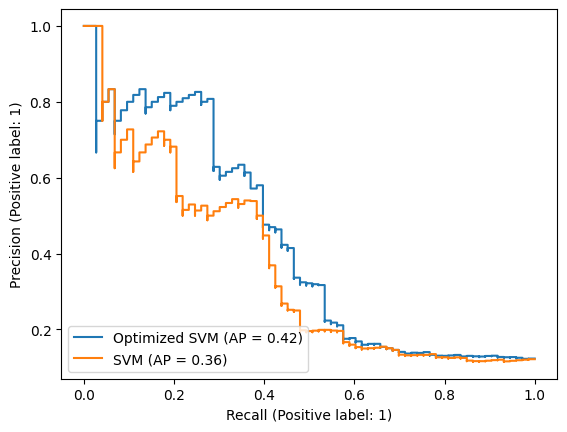

In [22]:
ax = plt.gca() #<- create a new axis object
ex_opt_svm_prec_recall = metrics.plot_precision_recall_curve(ex_sv_cv_optimized,
                                 X_test_ex, 
                                 y_test_ex,
                                 ax = ax,
                                 name = "Optimized SVM")

ex_svm_prec_recall.plot(ax = ax, name = "SVM") #<- add rf plot
plt.show()

#### Task 6

##### Similar to above, plot the ROC curve of the svm model.
##### Save the curve as `ex_opt_svm_roc`.
##### Plot the curves comparing the svm model curve `ex_svm_roc` and `ex_opt_svm_roc`. 


#### Result:

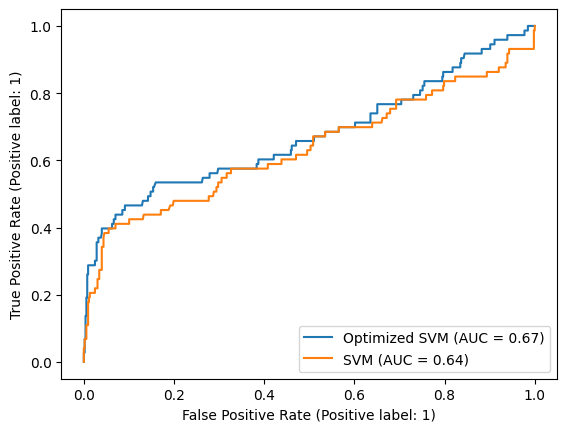

In [23]:
ax = plt.gca()
ex_opt_svm_roc = metrics.plot_roc_curve(ex_sv_cv_optimized,
                       X_test_ex,
                       y_test_ex,
                       name = "Optimized SVM",
                       ax = ax)

ex_svm_roc.plot(ax = ax, name = "SVM")
plt.show()

#### Task 7

##### Save the metrics to  `metrics_svm_ex` as "Optimized SVM".
##### Convert `metrics_svm_ex` into a pandas dataframe and create new column `metric` using the index.
##### Use `pd.melt()` to switch our dataframe to long format.
#### Result:


In [24]:
# Add the model to our dataframe.
metrics_svm_ex.update({"Optimized SVM": ex_opt_svm_scores})
print(metrics_svm_ex)

{'RF': {'accuracy': 0.8716666666666667, 'precision': 0.4411764705882353, 'recall': 0.2054794520547945, 'f1': 0.2803738317757009, 'fbeta': 0.3588516746411483, 'log_loss': 1.0075494584661249, 'AUC': 0.7337734917210366}, 'Optimized RF': {'accuracy': 0.8933333333333333, 'precision': 0.7142857142857143, 'recall': 0.2054794520547945, 'f1': 0.3191489361702127, 'fbeta': 0.4777070063694268, 'log_loss': 0.31929555370400753, 'AUC': 0.7813287931168932}, 'GBM': {'accuracy': 0.895, 'precision': 0.7083333333333334, 'recall': 0.2328767123287671, 'f1': 0.3505154639175258, 'fbeta': 0.5029585798816569, 'log_loss': 0.30041312491642347, 'AUC': 0.7918172129656105}, 'Optimized GBM': {'accuracy': 0.8816666666666667, 'precision': 0.5714285714285714, 'recall': 0.1095890410958904, 'f1': 0.1839080459770115, 'fbeta': 0.3100775193798449, 'log_loss': 0.3196653331095461, 'AUC': 0.7571287463284032}, 'SVC': {'accuracy': 0.87, 'precision': 0.3333333333333333, 'recall': 0.0684931506849315, 'f1': 0.11363636363636363, 'fbe

In [25]:
metrics_svm_df_ex = pd.DataFrame(metrics_svm_ex)
metrics_svm_df_ex["metric"] = metrics_svm_df_ex.index
metrics_svm_df_ex = metrics_svm_df_ex.reset_index(drop = True)
print(metrics_svm_df_ex.head())

         RF  Optimized RF       GBM  Optimized GBM       SVC       SVM  \
0  0.871667      0.893333  0.895000       0.881667  0.870000  0.888333   
1  0.441176      0.714286  0.708333       0.571429  0.333333  0.687500   
2  0.205479      0.205479  0.232877       0.109589  0.068493  0.150685   
3  0.280374      0.319149  0.350515       0.183908  0.113636  0.247191   
4  0.358852      0.477707  0.502959       0.310078  0.187970  0.401460   

   Optimized SVM     metric  
0       0.900000   accuracy  
1       0.809524  precision  
2       0.232877     recall  
3       0.361702         f1  
4       0.541401      fbeta  
